In [1]:
import numpy as np
import pandas as pd

In [2]:
pheno_infname = '../base338.txt'

in_data_df = pd.read_csv(pheno_infname, sep='\t', dtype={'HospitalID': str})
print(in_data_df.shape)
in_data_df.head()

(338, 77)


,HDSampleID,SampleName,HospitalID,UMC,UMC2,ManualSevereType,Severity,SysSevereType,LastTimeOfSysSevereType,Gender,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,D2002002751,1,0000223383,1.0,1,Moderate,A,2.0,2020-02-12,1,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,D2002002752,2,0000223107,0.0,0,Moderate,A,2.0,2020-01-23,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,D2002002753,3,0000222709,1.0,"1,5",Severe,B,NaN,NaN,2,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,D2002002754,4,0000222995,1.0,5,Critical,B,4.0,2020-02-16,1,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,D2002002755,5,0000223113,0.0,0,Moderate,A,2.0,2020-01-27,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [3]:
in_data_df.describe()

,UMC,SysSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,...,U/C,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,PCT
count,334.000000,311.000000,338.000000,338.000000,329.000000,338.000000,329.000000,319.000000,322.000000,333.000000,...,215.000000,215.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,324.000000
mean,0.443114,2.077170,1.523669,46.231538,137.747720,1.442811,189.738602,4.631160,4.947795,35.773273,...,66.668233,4.104744,65.689493,1049.307971,37.483333,593.217391,1.798986,24.040942,385.014493,0.200772
std,0.497499,0.533243,0.500180,17.192533,15.232353,0.718566,59.982150,0.530871,1.946353,5.729408,...,24.902016,1.490803,10.902704,572.235568,8.441789,328.822245,0.909137,8.308009,236.624812,0.060368
min,0.000000,1.000000,1.000000,1.750000,84.000000,0.160000,23.000000,2.670000,1.560000,22.000000,...,31.330000,1.720000,29.800000,93.000000,14.400000,58.000000,0.360000,4.800000,33.000000,0.030000
25%,0.000000,2.000000,1.000000,35.000000,127.000000,0.990000,145.000000,4.250000,3.642500,32.500000,...,49.965000,3.180000,58.800000,634.750000,32.250000,388.500000,1.220000,18.300000,204.000000,0.160000
50%,0.000000,2.000000,2.000000,49.000000,137.000000,1.280000,184.000000,4.610000,4.590000,35.400000,...,62.280000,3.870000,67.200000,975.500000,37.800000,538.500000,1.670000,23.100000,350.500000,0.190000
75%,1.000000,2.000000,2.000000,61.000000,146.000000,1.747500,224.000000,4.940000,5.640000,38.700000,...,75.905000,4.730000,73.100000,1335.750000,42.125000,739.000000,2.160000,28.500000,518.750000,0.240000
max,1.000000,4.000000,2.000000,86.000000,186.000000,6.870000,376.000000,6.630000,16.660000,84.900000,...,241.920000,14.120000,88.200000,4552.000000,61.900000,2626.000000,7.830000,56.800000,1685.000000,0.440000


In [3]:
col_name = list(in_data_df.columns)
unwant_col = ['SampleName', 'HDSampleID', 'Severity', 'SysSevereType', 
              'LastTimeOfSysSevereType', 'UMC2', 'Nationality', 'Hometown']
fisrt_labs_f = np.array([x for x in col_name if x not in unwant_col])
print(fisrt_labs_f)
print(len(fisrt_labs_f))

['HospitalID' 'UMC' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT'
 'RBC' 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' '5NT' 'ALP' 'Ca*Pi' 'Ca++'
 'CHE' 'CL' 'GGT' 'K' 'LDH' 'MAO' 'Mg' 'Na' 'Pi-' 'A/G' 'ALB' 'ALT' 'AST'
 'AST/ALT' 'Bc-TR' 'DB' 'GLO' 'ID' 'm-AST' 'PA' 'TB' 'TBA' 'TP' 'FIO2'
 'Lac' 'LACT' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CHOL' 'CO2' 'Cr' 'CRP' 'eGFR'
 'HDL' 'LDL' 'TG' 'U/C' 'Urea' 'T-CELL' 'Tc-Count' 'Th-Cell' 'Th-Count'
 'TH/TS' 'Ts-Cell' 'Ts-Count' 'IL6' 'PCT']
69


In [4]:
sel_data_df = in_data_df[fisrt_labs_f].copy()

In [5]:
# find columns being string data type
col_inx_has_str = [idx for idx,x in enumerate(sel_data_df.dtypes) if x != 'float64' and idx > 3 ]

# get the string-type column name
fisrt_labs_f[col_inx_has_str]

array(['D-DIC', 'GGT', 'ALT', 'CRP', 'IL6'], dtype='<U16')

In [6]:
# string data processing

# extract float value
float_regex = r'([+-]?\d+\.\d+|\d+)'
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].str.extract(float_regex, expand=False)
sel_data_df['D-DIC'] = sel_data_df['D-DIC'].astype(float)

sel_data_df['GGT'] = sel_data_df['GGT'].str.extract(float_regex, expand=False)
sel_data_df['GGT'] = sel_data_df['GGT'].astype(float)

sel_data_df['ALT'] = sel_data_df['ALT'].str.extract(float_regex, expand=False)
sel_data_df['ALT'] = sel_data_df['ALT'].astype(float)

sel_data_df['CRP'] = sel_data_df['CRP'].str.extract(float_regex, expand=False)
sel_data_df['CRP'] = sel_data_df['CRP'].astype(float)

sel_data_df['IL6'] = sel_data_df['IL6'].str.extract(float_regex, expand=False)
sel_data_df['IL6'] = sel_data_df['IL6'].astype(float)



In [7]:
# calculate the nan counts for each column
dd = pd.DataFrame(sel_data_df.isnull().sum())
dd

,0
HospitalID,0
UMC,4
ManualSevereType,0
Gender,0
Age,0
...,...
TH/TS,62
Ts-Cell,62
Ts-Count,62
IL6,169


In [8]:
# find columns having nan values (the number of nan > rate*len(df))
rate = 0.5
col_inx_has_nan = [idx for idx,x in enumerate(sel_data_df.isnull().sum()) if x > rate * len(sel_data_df)]

# get the filter-out columns
print(len(fisrt_labs_f[col_inx_has_nan]))
fisrt_labs_f[col_inx_has_nan]

15


array(['5NT', 'ALP', 'Ca*Pi', 'Ca++', 'MAO', 'Mg', 'Pi-', 'Bc-TR',
       'm-AST', 'PA', 'LACT', 'CHOL', 'HDL', 'LDL', 'TG'], dtype='<U16')

In [9]:
# get the remain columns
remain_col_inx = list(set(range(len(fisrt_labs_f))) - set(col_inx_has_nan))
remain_col_inx.sort()
print(len(remain_col_inx))
final_colnames = fisrt_labs_f[remain_col_inx]
print(final_colnames)

# obtain the final datafram
final_data_df = sel_data_df[final_colnames].copy()

final_data_df.head()

54
['HospitalID' 'UMC' 'ManualSevereType' 'Gender' 'Age' 'HGB' 'LYMPH#' 'PLT'
 'RBC' 'WBC' 'APTT' 'D-DIC' 'FIB' 'PT' 'TT' 'CHE' 'CL' 'GGT' 'K' 'LDH'
 'Na' 'A/G' 'ALB' 'ALT' 'AST' 'AST/ALT' 'DB' 'GLO' 'ID' 'TB' 'TBA' 'TP'
 'FIO2' 'Lac' 'O2AT' 'PCO2' 'PH' 'PO2' 'AG' 'CO2' 'Cr' 'CRP' 'eGFR' 'U/C'
 'Urea' 'T-CELL' 'Tc-Count' 'Th-Cell' 'Th-Count' 'TH/TS' 'Ts-Cell'
 'Ts-Count' 'IL6' 'PCT']


,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,0000223383,1.0,Moderate,1,51.0,158.0,0.99,156.0,5.15,3.53,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,0000223107,0.0,Moderate,1,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,0000222709,1.0,Severe,2,65.0,122.0,0.88,161.0,3.96,4.31,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,0000222995,1.0,Critical,1,63.0,170.0,0.31,119.0,5.64,6.79,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,0000223113,0.0,Moderate,1,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [10]:
final_colnames

array(['HospitalID', 'UMC', 'ManualSevereType', 'Gender', 'Age', 'HGB',
       'LYMPH#', 'PLT', 'RBC', 'WBC', 'APTT', 'D-DIC', 'FIB', 'PT', 'TT',
       'CHE', 'CL', 'GGT', 'K', 'LDH', 'Na', 'A/G', 'ALB', 'ALT', 'AST',
       'AST/ALT', 'DB', 'GLO', 'ID', 'TB', 'TBA', 'TP', 'FIO2', 'Lac',
       'O2AT', 'PCO2', 'PH', 'PO2', 'AG', 'CO2', 'Cr', 'CRP', 'eGFR',
       'U/C', 'Urea', 'T-CELL', 'Tc-Count', 'Th-Cell', 'Th-Count',
       'TH/TS', 'Ts-Cell', 'Ts-Count', 'IL6', 'PCT'], dtype='<U16')

In [11]:
# find the patient without ManualSevereType
final_data_df[final_data_df['ManualSevereType'].isnull()]

,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT


In [12]:
final_data_df = final_data_df[~final_data_df['ManualSevereType'].isnull()].reset_index(drop=True)
final_data_df.head()

,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,0000223383,1.0,Moderate,1,51.0,158.0,0.99,156.0,5.15,3.53,...,NaN,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16
1,0000223107,0.0,Moderate,1,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22
2,0000222709,1.0,Severe,2,65.0,122.0,0.88,161.0,3.96,4.31,...,1.95,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16
3,0000222995,1.0,Critical,1,63.0,170.0,0.31,119.0,5.64,6.79,...,9.81,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12
4,0000223113,0.0,Moderate,1,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25


In [13]:
final_data_df.shape

(338, 54)

In [14]:
final_data_df['ManualSevereType'].value_counts()

Moderate        231
Severe           53
Asymptomatic     25
Critical         17
Mild             12
Name: ManualSevereType, dtype: int64

In [15]:
# convert Severity into ordinary value
ord_val = {'Asymptomatic': 1,'Mild': 2, 'Moderate': 3, 'Severe': 4, 'Critical': 5}       

final_data_df['Label'] = final_data_df['ManualSevereType'].apply(lambda x: ord_val[x])
final_data_df['Gender']=final_data_df['Gender']-1
final_data_df.head()

,HospitalID,UMC,ManualSevereType,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,...,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT,Label
0,0000223383,1.0,Moderate,0,51.0,158.0,0.99,156.0,5.15,3.53,...,86.3,881.0,48.9,499.0,1.45,33.7,343.0,10.43,0.16,3
1,0000223107,0.0,Moderate,0,35.0,136.0,1.59,236.0,4.49,4.62,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.17,0.22,3
2,0000222709,1.0,Severe,1,65.0,122.0,0.88,161.0,3.96,4.31,...,66.4,551.0,47.3,392.0,2.83,16.7,139.0,NaN,0.16,4
3,0000222995,1.0,Critical,0,63.0,170.0,0.31,119.0,5.64,6.79,...,30.3,93.0,18.7,58.0,1.72,10.9,33.0,79.45,0.12,5
4,0000223113,0.0,Moderate,0,36.0,151.0,2.37,250.0,5.05,13.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.92,0.25,3


# Create dataset for training

In [16]:
y = final_data_df['Label'].values
X_df = final_data_df.drop(columns=['HospitalID', 'ManualSevereType', 'Label']).copy()
X_col_name = list(X_df.columns)
X = X_df.values

# Missing value impute

install missingpy
https://pypi.org/project/missingpy/


In [17]:
from missingpy import MissForest

imputer = MissForest(random_state=1337)
X_imped = imputer.fit_transform(X)

Iteration: 0
Iteration: 1
Iteration: 2


In [18]:
# normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_imped_norm = scaler.fit_transform(X_imped)

# X_df_imped_norm = pd.DataFrame(X_imped_norm, columns=X_col_name) # XGB可以不用作normalization

X_df_imped_norm = pd.DataFrame(X_imped, columns=X_col_name)
X_df_imped_norm.head()

,UMC,Gender,Age,HGB,LYMPH#,PLT,RBC,WBC,APTT,D-DIC,...,Urea,T-CELL,Tc-Count,Th-Cell,Th-Count,TH/TS,Ts-Cell,Ts-Count,IL6,PCT
0,1.0,0.0,51.0,158.0,0.99,156.0,5.15,3.53,41.0,0.24,...,5.2959,86.300,881.00,48.900,499.00,1.4500,33.700,343.00,10.4300,0.16
1,0.0,0.0,35.0,136.0,1.59,236.0,4.49,4.62,36.3,0.44,...,5.2403,66.669,1105.48,39.570,643.19,1.7032,23.614,369.86,15.1700,0.22
2,1.0,1.0,65.0,122.0,0.88,161.0,3.96,4.31,37.9,0.65,...,1.9500,66.400,551.00,47.300,392.00,2.8300,16.700,139.00,32.4306,0.16
3,1.0,0.0,63.0,170.0,0.31,119.0,5.64,6.79,38.7,2.85,...,9.8100,30.300,93.00,18.700,58.00,1.7200,10.900,33.00,79.4500,0.12
4,0.0,0.0,36.0,151.0,2.37,250.0,5.05,13.55,27.9,0.22,...,4.9221,65.154,1181.28,38.818,655.72,1.6975,22.964,393.09,1.9200,0.25


# Using Xgb as ordinary regression

In [55]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
data_dmatrix = xgb.DMatrix(data=X_df_imped_norm,label=y)

In [97]:
params = {"objective":"reg:squarederror",'colsample_bytree': 0.3,'learning_rate': 0.5,
          'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=500,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)


cv_results.head()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.522722,0.028293,1.562501,0.093086
1,0.983153,0.032149,1.069499,0.080413
2,0.748399,0.026168,0.879636,0.068035
3,0.641124,0.018800,0.805382,0.059166
4,0.561100,0.007209,0.756394,0.043257


In [98]:
cv_results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,1.522722,0.028293,1.562501,0.093086
1,0.983153,0.032149,1.069499,0.080413
2,0.748399,0.026168,0.879636,0.068035
3,0.641124,0.018800,0.805382,0.059166
4,0.561100,0.007209,0.756394,0.043257
5,0.518809,0.004984,0.740826,0.041533
6,0.494370,0.004009,0.729755,0.040474
7,0.479480,0.006480,0.725244,0.039547
8,0.466630,0.006859,0.722791,0.034795
9,0.454733,0.007830,0.723713,0.031693


In [99]:
print((cv_results["test-rmse-mean"]).tail(1))

10    0.721103
Name: test-rmse-mean, dtype: float64


In [100]:
# xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)
# xgb.plot_importance(xg_reg)
# plt.rcParams['figure.figsize'] = [10, 20]
# plt.show()

from xgboost import XGBRegressor 
xg_reg = XGBRegressor(**params)
xg_reg.fit(X_df_imped_norm, y)


XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.5, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=10,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

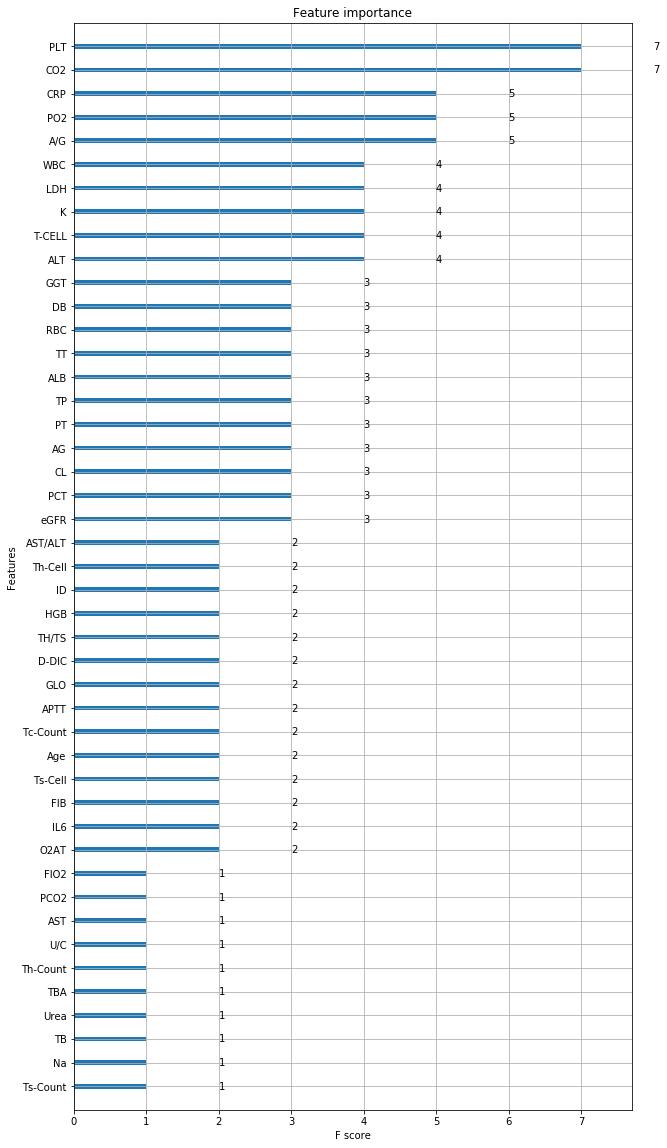

In [101]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 20]
xgb.plot_importance(xg_reg)


# Feature selection based on feature importance

In [102]:
feat_imp = xg_reg.feature_importances_

In [103]:
feat_imp

array([0.0000000e+00, 0.0000000e+00, 3.3048131e-02, 2.9406615e-03,
       0.0000000e+00, 4.2304210e-03, 8.0493884e-03, 3.1101529e-03,
       7.2160657e-03, 7.3891277e-03, 8.4086275e-03, 1.5131141e-02,
       1.9625619e-02, 0.0000000e+00, 1.0367956e-02, 2.2614570e-03,
       7.2066179e-03, 3.3133866e-03, 3.3622760e-02, 4.3873996e-02,
       2.8274842e-03, 9.8214978e-03, 2.5839582e-03, 5.7380428e-03,
       4.9857758e-03, 4.4258637e-03, 2.4112647e-03, 1.6785288e-02,
       8.7864650e-03, 1.0653408e-02, 1.2364304e-04, 0.0000000e+00,
       9.6273683e-03, 7.9256793e-08, 0.0000000e+00, 2.1968089e-02,
       2.3549780e-02, 3.7243431e-03, 0.0000000e+00, 3.5234328e-02,
       1.8134981e-01, 1.5547067e-03, 2.2568233e-02, 3.0339251e-03,
       4.2079244e-02, 3.0289202e-03, 1.2982923e-02, 7.0348517e-03,
       9.4264979e-03, 1.2261596e-01, 2.0006673e-01, 2.1216020e-02],
      dtype=float32)

In [104]:
# select features whose importance greater than 0.01 

# lower_bound = 0.008

# sel_idx = [idx for idx, x in enumerate(feat_imp) if x >= lower_bound]
# sel_cols = np.array(X_col_name)[sel_idx]

# X_df_imped_norm_sel = X_df_imped_norm[sel_cols]
# X_df_imped_norm_sel.head()

In [105]:
# # select top features
# n_top = 10
# top_indx = np.argsort(feat_imp)[::-1][:20]
# sel_cols = np.array(X_col_name)[top_indx]
# X_df_imped_norm_sel = X_df_imped_norm[sel_cols]
# print(sel_cols)
# X_df_imped_norm_sel.head()

In [106]:
# sel_cols

# retrain model with selected features

In [107]:
# xg_reg_ = XGBRegressor(**params)
# xg_reg_.fit(X_df_imped_norm_sel, y)

In [108]:
# xgb.plot_importance(xg_reg_)

# Prediction

In [109]:
y_pred = xg_reg.predict(X_df_imped_norm)
# y_pred_adj = np.array([1 if x < 1 else 5 if x > 5 else x for x in y_pred ])
y_pred_adj = y_pred
y_pred_adj_lab = np.round(y_pred_adj)

In [110]:
min(y_pred)

0.5318978

In [111]:
pred_df = pd.DataFrame(data={'HospitalID': final_data_df['HospitalID'].values,
                            'ManualSevereType': final_data_df['ManualSevereType'].values,
                            #'Y_true': final_data_df['Label'].values,
                            'Score': y_pred_adj,
                            #'Y_pred_label': y_pred_adj_lab
                            })

In [112]:
pred_df

,HospitalID,ManualSevereType,Score
0,0000223383,Moderate,3.047140
1,0000223107,Moderate,3.036073
2,0000222709,Severe,3.720693
3,0000222995,Critical,4.319904
4,0000223113,Moderate,2.569915
...,...,...,...
333,0000223919,Moderate,3.273809
334,0000224070,Asymptomatic,1.636476
335,0000223966,Moderate,2.861662
336,0000223858,Asymptomatic,1.481984


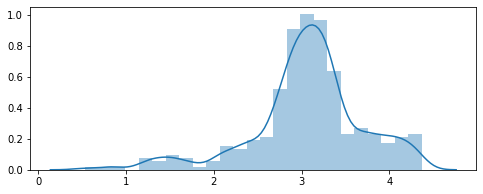

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(8, 3))
sns.distplot(pred_df['Score'].values,
             kde=True,ax=ax)


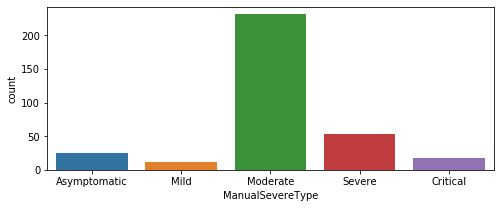

In [114]:
fig, ax = plt.subplots(1,1,figsize=(8, 3))
sns.countplot(x="ManualSevereType", data=pred_df, ax = ax, order=['Asymptomatic','Mild', 'Moderate', 'Severe', 'Critical'])


In [115]:
pred_df.to_csv('xgb_score_v3.dat', sep='\t', index=False)

In [36]:
from sklearn.metrics import recall_score, precision_score
y_t = pred_df['Y_true'].values
y_p_p = pred_df['Y_pred'].values
y_p_l = pred_df['Y_pred_label'].values

avg_recall = recall_score(y_t, y_p_l, average="weighted")
print('mean recall: {}'.format(avg_recall))
print('mean precision: {}'.format(average_precision))

KeyError: 'Y_true'